<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
Авторы материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий и Data Scientist в Segmento Екатерина Демидова. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Часть 0. Работа с векторами в библиотеке NumPy

**Numpy** - это библиотека Python для вычислительно эффективных операций с многомерными массивами, предназначенная в основном для научных вычислений.

Numpy - пакет для векторизованных вычислений в Python'e. Основной объект в numpy - nddarray, который располагается напрерывно в памяти и позволяет производить быстрые вычисления (конструктор для ndarray - array, так как последний не является массивом, то мы будем использовать array и ndarray как синонимы без всякого риска).

В чем преимущества массива в numpy перед списком в Питоне?

    статическая типизация и гомогенность;
    возможность компиляции функций, работающих с статистически типизированными объектами;
    как следствие, эффективное использование RAM и CPU;

То, что элементы array расположены последовательно означает, что следовать за a[i] элементом массива в памяти будет элемент a[i+1]. Каждый элемент занимает, разумеется, itemsize байтов.

In [2]:
# Python 2 and 3 compatibility
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
import numpy as np

In [3]:
# статическая типизация - тип не меняется
a = np.arange(10, dtype=np.int)
a[0] = np.pi
a

array([3, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

Такой массив может содержать:
- значения физических величин в разые моменты времени при моделировании
- значения сигнала, измеренного прибором
- интенсивности пикселов 
- 3D координаты объектов, полученных, например, при МРТ
- ...


* основной объект numpy - гомогенный массив фиксированного размера;
* для доступа к элементам массива пользуйтесь slicing и помните, что slicing создает view, а значит исходный массив может быть изменен.

In [6]:
a = np.array([1,2,3])
t = a[1:3]
print (t)
t[0] = 5
print (a)

[2 3]
[1 5 3]


**Зачем NumPy:** Эффективность базовых операций 


In [7]:
L = range(1000)

In [8]:
%timeit [i**2 for i in L]

409 µs ± 30.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
a = np.arange(1000)

In [10]:
%timeit a**2

2.54 µs ± 36 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Интерактивная справка


In [11]:
?np.array

поиск в документации


In [12]:
np.lookfor('create array') 

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In [13]:
np.con*?

#### Библиотеку принято импортировать так

In [10]:
import numpy as np

## Создание массивов

* **1-D**:


In [14]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [15]:
a.ndim

1

In [16]:
a.shape

(4,)

In [17]:
len(a)

4

* **2-D, 3-D, ...**:


In [18]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array
b

array([[0, 1, 2],
       [3, 4, 5]])

In [20]:
b.ndim

2

In [21]:
b.shape

(2, 3)

In [22]:
len(b)     # returns the size of the first dimension

2

In [24]:
c = np.array([[[1,2], [2,3]], [[3,4], [4,5]]])
c

array([[[1, 2],
        [2, 3]],

       [[3, 4],
        [4, 5]]])

In [25]:
c.shape

(2, 2, 2)

## Методы для создания массивов

На практике мы редко добавляем элементы по одному


- Равномерно распределенные элементы:


In [26]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

- по числу элементов:


In [28]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [29]:
d = np.linspace(0, 1, 5, endpoint=False)
d

array([0. , 0.2, 0.4, 0.6, 0.8])

- Часто встречающиеся массивы:


In [30]:
a = np.ones((3, 3))  # reminder: (3, 3) is a tuple
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [31]:
b = np.zeros((2, 2))
b

array([[0., 0.],
       [0., 0.]])

In [32]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [33]:
d = np.diag(np.array([1, 2, 3, 4]))
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

* `np.random` генерация случайных чисел (Mersenne Twister PRNG):

In [3]:
a = np.random.rand(4)       # uniform in [0, 1]
a  

array([0.71747806, 0.48492333, 0.37608088, 0.86930932])

In [6]:
b = np.random.randn(4)      # Gaussian
b  

array([ 0.9234854 , -0.08775297,  0.30049247, -0.01739531])

In [13]:
np.random.seed(1234)        # Setting the random seed
print(np.random.uniform(0, 10, 5))
#array([ 1.9151945 ,  6.22108771,  4.37727739,  7.85358584,  7.79975808])
print(np.random.rand(2,3))
#array([[ 0.27259261,  0.27646426,  0.80187218],
#       [ 0.95813935,  0.87593263,  0.35781727]])

[1.9151945  6.22108771 4.37727739 7.85358584 7.79975808]
[[0.27259261 0.27646426 0.80187218]
 [0.95813935 0.87593263 0.35781727]]


## Основные типы данных NumPy

Точка после числа означает, что это тип данных `float64`


In [17]:
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [16]:
b = np.array([1., 2., 3.])
b.dtype

dtype('float64')

Можно задать тип данных явно. По умолчанию - `float64`

In [18]:
c = np.array([1, 2, 3], dtype=float)
c.dtype

dtype('float64')

In [23]:
a = np.ones((3, 3), dtype=int)
a.dtype

dtype('int32')

Прочие типы данных:

- Комплексные числа


In [24]:
d = np.array([1+2j, 3+4j, 5+6*1j])
d.dtype


dtype('complex128')

 - Bool


In [25]:
e = np.array([True, False, False, True])
e.dtype

dtype('bool')

- Строки

На строки память выделяется "жадно" - по максимальному числу литер в строке. 
В этом примере на каждую строку выделяется по 7 литер, и тип данных - 'S7'

In [26]:
f = np.array(['Bonjour', 'Hello', 'Hallo'])
f.dtype     # <--- strings containing max. 7 letters

dtype('<U7')

## Основы визуализации

$ ipython notebook --pylab=inline

Или из тетрадки:

In [27]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Параметр `inline` говорит серверу IPython о том, что результаты будут отображаться в самой тетрадке, а не в новом окне. 


Импортируем *Matplotlib*


In [67]:
import matplotlib.pyplot as plt  # the tidy way

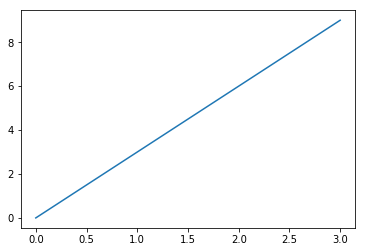

In [28]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    
plt.show()           # <-- shows the plot (not needed with pylab) 

Или с использованием *pylab*:


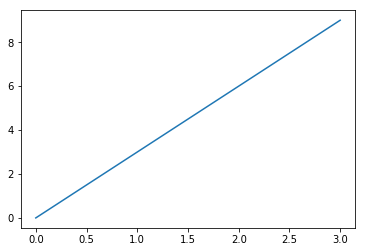

In [29]:
plot(x, y)       # line plot    

Использование `import matplotlib.pyplot as plt` рекомендуется для скриптов, а `pylab` - в тетрадках IPython.

 - Отображение одномерных массивов:


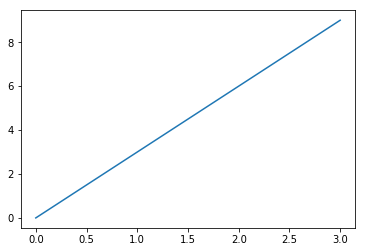

In [30]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

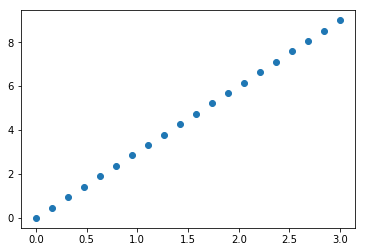

In [31]:
plt.plot(x, y, 'o')  # dot plot    

- Отображение двухмерных массивов (например, изображений):


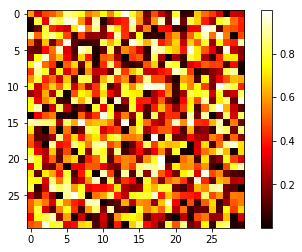

In [33]:
# можно поиграться, попробуйте построить равномерное распределение и гауссово
# равномерное
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()


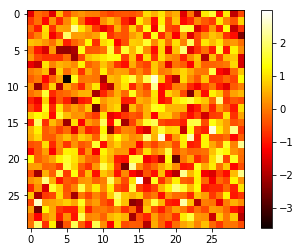

In [34]:
# гауссово
image2 = np.random.randn(30, 30)
plt.imshow(image2, cmap=plt.cm.hot)    
plt.colorbar()

(array([ 4.,  0.,  2.,  1.,  5.,  6.,  4.,  2.,  3.,  8., 11., 12., 21.,
        24., 27., 20., 35., 34., 42., 40., 44., 52., 39., 42., 49., 54.,
        40., 47., 36., 43., 26., 35., 33., 33., 13., 27., 18., 14., 12.,
         6., 11., 11.,  5.,  4.,  1.,  1.,  0.,  2.,  0.,  1.]),
 array([-2.92052818, -2.79972558, -2.67892298, -2.55812038, -2.43731778,
        -2.31651518, -2.19571258, -2.07490998, -1.95410738, -1.83330479,
        -1.71250219, -1.59169959, -1.47089699, -1.35009439, -1.22929179,
        -1.10848919, -0.98768659, -0.86688399, -0.74608139, -0.62527879,
        -0.50447619, -0.3836736 , -0.262871  , -0.1420684 , -0.0212658 ,
         0.0995368 ,  0.2203394 ,  0.341142  ,  0.4619446 ,  0.5827472 ,
         0.7035498 ,  0.8243524 ,  0.94515499,  1.06595759,  1.18676019,
         1.30756279,  1.42836539,  1.54916799,  1.66997059,  1.79077319,
         1.91157579,  2.03237839,  2.15318099,  2.27398358,  2.39478618,
         2.51558878,  2.63639138,  2.75719398,  2.87799658,

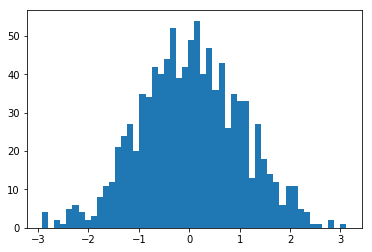

In [37]:
gauss_distr = np.random.randn(1000)
plt.hist(gauss_distr, bins=50)

array([9, 4, 7, ..., 6, 9, 9])

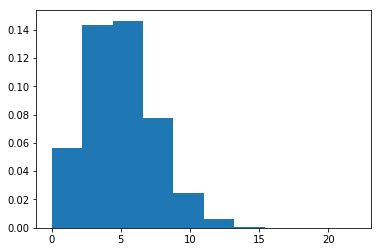

In [40]:
# распределени Пуассона(дискретное)
s = np.random.poisson(5, 10000000)
plt.hist(s,normed=True, bins=10)
s

## Индексирование массивов и срезы

В целом так же, как со встроенными последовательностями Python (например, как со списками).


In [41]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
b = np.array([i for i in range(10)])

In [43]:
a[0], a[2], a[-1]

(0, 2, 9)

Работает и популярный в Python способ отражения массива:


In [44]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [45]:
a[::2]

array([0, 2, 4, 6, 8])

Для многомерных массивов индексы - это кортежи целых чисел


In [46]:
a = np.diag(np.arange(3))
a

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

In [49]:
a[1, 1]

1

In [60]:
a[2, 1] = 10 # third line, second column
a[0, 2] = 3
a

array([[ 0,  0,  3],
       [ 0,  1,  0],
       [ 0, 10,  2]])

In [78]:
a[1]

array([0, 1, 0])

In [85]:
a[:,::2]

array([[0, 3],
       [0, 0],
       [0, 2]])

In [67]:
a[:,1] + a[:,2]

array([ 3,  1, 12])

**Срезы**

In [182]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [183]:
a[2:9:3] # [start:end:step]

array([2, 5, 8])

Последний индекс не включается

In [184]:
a[:4]

array([0, 1, 2, 3])

По умолчанию \`start\` -  0,
\`end\` - индекс последнего элемента, \`step\` - 1:


In [185]:
a[1:3]

array([1, 2])

In [186]:
a[::2]

array([0, 2, 4, 6, 8])

In [187]:
a[3:]

array([3, 4, 5, 6, 7, 8, 9])

Можно совмещать присваивание и срез:


In [188]:
a = np.arange(10)
a[5:] = 10
a

array([ 0,  1,  2,  3,  4, 10, 10, 10, 10, 10])

In [189]:
b = np.arange(5)
a[5:] = b[::-1]
a

array([0, 1, 2, 3, 4, 4, 3, 2, 1, 0])

## Пример. Матрица делителей

Отобразить матрицу, в которой вычеркивается **(x, y)**, если **y** делится на **x**.

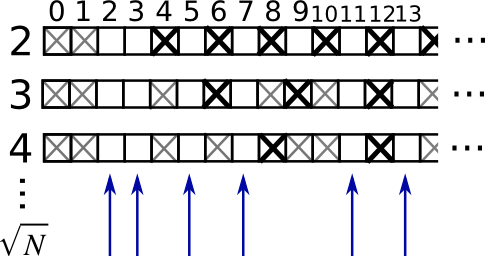

In [2]:
from IPython.display import Image
Image(filename='../../img/prime-sieve.png')

* Создадим массив `is_prime`, заполненний значениями True


In [86]:
is_prime = np.ones((100,), dtype=bool)

* Вычеркнем 0 и 1 как не являющиеся простыми:


In [89]:
is_prime[:2] = 0

* Для каждого натурального `j` начиная с  2, "вычеркнем" числа, ему кратные:


In [90]:
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    #print (np.arange(100)[is_prime], "\n")
    is_prime[2*j::j] = False
    
np.arange(100)[is_prime] # получили все простые числа до 100

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

## Индексирование масками

In [105]:
np.random.seed(3)
a = np.random.random_integers(0, 20, 15)
a

array([10,  3,  8,  0, 19, 10, 11,  9, 10,  6,  0, 20, 12,  7, 14])

In [103]:
(a % 3 == 0)

array([ True,  True, False,  True, False,  True, False,  True,  True,
        True,  True, False,  True, False, False])

In [106]:
mask = (a % 3 == 0)
extract_from_a = a[mask] # or,  a[a%3==0]
extract_from_a           # extract a sub-array with the mask


array([ 3,  0,  9,  6,  0, 12])

Индексирование маской может быть очень полезным для присваивания значений части элементов массива:


In [198]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, 20, -1,  7, 14])

### Индексирование массивом целых чисел

In [199]:
a = np.arange(0, 100, 10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [200]:
a[[2, 3, 2, 4, 2]]  # note: [2, 3, 2, 4, 2] is a Python list

array([20, 30, 20, 40, 20])

In [201]:
a[[9, 7]] = -100
a

array([   0,   10,   20,   30,   40,   50,   60, -100,   80, -100])

In [112]:
a = np.arange(10,20)
idx = np.array([[3, 4], [9, 7]])
idx.shape
a[idx]

array([[13, 14],
       [19, 17]])

**Flattening массива**

In [120]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel(), a.T.ravel()

(array([1, 2, 3, 4, 5, 6]), array([1, 4, 2, 5, 3, 6]))

In [123]:
print (a.shape)
b = a.ravel()
b.reshape((3, 2))

(2, 3)


array([[1, 2],
       [3, 4],
       [5, 6]])

In [131]:
a = np.arange(5)
a.resize((4,))
a

array([0, 1, 2, 3])

In [132]:
a = np.array([[1, 2], [3, 4]])
print (np.repeat(a, 3))
print (np.tile(a, 3))


[1 1 1 2 2 2 3 3 3 4 4 4]
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]


In [136]:
b = np.array([[5, 6]])
print (np.concatenate((a, b), axis=0), "\n")
print (np.concatenate((a, b.T), axis=1))

[[1 2]
 [3 4]
 [5 6]] 

[[1 2 5]
 [3 4 6]]


In [137]:
print (np.hstack((a,b.T)))
print (a.shape, b.T.shape)

[[1 2 5]
 [3 4 6]]
(2, 2) (2, 1)


In [47]:
print (np.vstack((a,b)))
print (a.shape, b.shape)

[[1 2]
 [3 4]
 [5 6]]
(2, 2) (1, 2)


# Scipy

**Разреженные матрицы**

In [139]:
import numpy as np
from scipy.sparse import csc_matrix, csr_matrix

row = np.array([0, 2, 2, 0, 1, 2])
col = np.array([0, 0, 1, 2, 2, 2])
data = np.array([1, 2, 3, 4, 5, 6])
csc_matrix((data, (row, col)), shape=(3, 3))

<3x3 sparse matrix of type '<class 'numpy.int32'>'
	with 6 stored elements in Compressed Sparse Column format>

In [241]:
csc_matrix((data, (row, col)), shape=(3, 3)).toarray()

array([[ 1,  0,  4],
       [ 0,  0,  5],
       [ 2,  3, 12]], dtype=int64)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

**Методы оптимизации**

In [140]:
from scipy.optimize import minimize
import numpy as np
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [52]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
res

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


 final_simplex: (array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.00000001, 1.00000001],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99999999]]), array([4.86115343e-17, 7.65182843e-17, 8.11395684e-17, 8.63263255e-17,
       8.64080682e-17, 2.17927418e-16]))
           fun: 4.861153433422115e-17
       message: 'Optimization terminated successfully.'
          nfev: 571
           nit: 339
        status: 0
       success: True
             x: array([1., 1., 1., 1., 1.])

In [56]:
res = minimize(lambda x: (x - 2.7) ** 2 + 3, x0=100, method='BFGS')
res

      fun: 3.0
 hess_inv: array([[0.49999996]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([2.69999999])

**Самостоятельно**

Подумайте, чем slice отлиаеся от копирование (в синтаксисе numpy - np.copy)

# Практика на уроке

# Задачки

- Создать "шахматную доску" на numpy:

```1 0 1 0 1
0 1 0 1 0
1 0 1 0 1
0 1 0 1 0
1 0 1 0 1```

- Создать случайный вектор и занулить три самых больших по модулю значения (подсказка - np.argsort())

- Диагональная матрица с квадратами натуральных чисел

- Змейка 

```[[ 1  6 11 16 21]
 [ 2  7 12 17 22]
 [ 3  8 13 18 23]
 [ 4  9 14 19 24]
 [ 5 10 15 20 25]]```
 
- Евклидово расстояние между вектором и всеми строчками матрицы

- Косинусное расстояние между вектором и всеми строчками матрицы. Косинусное расстояние для векторов
 

In [238]:
a = np.array([[True]])
for _ in range(7):
    a = np.vstack((~a[0], a))
    a = np.hstack((~a[:,:1], a))
print(a*1)
a[:,0].reshape(8,1) == a[:,:1]

[[1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]]


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [209]:
a = np.zeros((8,8), dtype=int)
a[::2,::2] = 1
a[1::2,1::2] = 1
a

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

In [239]:
a = np.random.random_integers(1,10,10)
print(a)
a[np.argsort(a)[:-4:-1]] = 0
a

[1 9 3 8 3 2 4 3 5 2]


array([1, 0, 3, 0, 3, 2, 4, 3, 0, 2])